# Problem Statment:-
* Objective:- The objective of this Analysis is to understand , how bill value is effecting with respect to feature attached to it (Gender, Time, Smoker etc)

In [1]:
# importing necessaries libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
%matplotlib notebook

In [2]:
# setting setting for visualization
sns.set(rc = {'axes.facecolor': 'white',
              'axes.grid': False,
              'axes.labelsize': 12,
              'axes.titlecolor': 'auto',
              'axes.titlesize': 'large',
              'figure.dpi': 100.0,
              'legend.fontsize': 'medium',})

In [3]:
# Import Datasets
df = pd.read_excel(r"C:\Users\javed.s\Desktop\Rough\tips.xlsx")
# checking Data
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Making copy of orginal data
tips = df.copy()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Data checking and understanding

In [6]:
# checking how many rows and column datasets have ?
print('The datasets has {} Rows and {} columns'.format(tips.shape[0],tips.shape[1]))

The datasets has 244 Rows and 7 columns


In [7]:
# what are columns datasets have ?
print('Total Number of columns are:',str(len(list(tips.columns))) + ' ' + 'and they are:')
print(list(tips.columns))

Total Number of columns are: 7 and they are:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [8]:
# check the datatypes of columns:
tips.dtypes

# Observation:- There are no need to edit data types

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
# checking Info about data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
# checking for duplicate records
print('Number of Duplicate records are:',tips.duplicated().sum())
tips[tips.duplicated()==1]

Number of Duplicate records are: 1


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [11]:
# Remove the duplicate records
tips.drop_duplicates(inplace=True)

In [12]:
# Duplicate record removed
tips.shape

(243, 7)

In [13]:
# checking number of unique categories per column have
tips.nunique().sort_values()

sex             2
smoker          2
time            2
day             4
size            6
tip           123
total_bill    229
dtype: int64

In [14]:
# bifercating Category and numerical columns
cat_col = tips.select_dtypes(include='object')
num_col = tips.select_dtypes(exclude='object')
print(cat_col.columns)
print()
print(num_col.columns)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

Index(['total_bill', 'tip', 'size'], dtype='object')


In [15]:
def cat_unique(df,col):
    result = df[col].unique()
    print('The {} has sub category   : {}'.format(col,result))

In [16]:
# checking waht are sub category in each categorical columns
for i in cat_col.columns:
    cat_unique(tips,i)

The sex has sub category   : ['Female' 'Male']
The smoker has sub category   : ['No' 'Yes']
The day has sub category   : ['Sun' 'Sat' 'Thur' 'Fri']
The time has sub category   : ['Dinner' 'Lunch']


In [17]:
# Running descriptive statistics on numerical columns
tips.describe().round(2)

,total_bill,tip,size
count,243.00,243.00,243.00
mean,19.81,3.00,2.57
std,8.91,1.39,0.95
min,3.07,1.00,1.00
25%,13.38,2.00,2.00
50%,17.81,2.92,2.00
75%,24.17,3.58,3.00
max,50.81,10.00,6.00


In [18]:
print('Total Bill   : inital  observation show there may be outlier on higher side')
print('Tips         : inital  observation show there may be outlier on higher side')

Total Bill   : inital  observation show there may be outlier on higher side
Tips         : inital  observation show there may be outlier on higher side


In [19]:
# EDA - univariate analysis
# numerical columns
num_col


,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


<IPython.core.display.Javascript object>


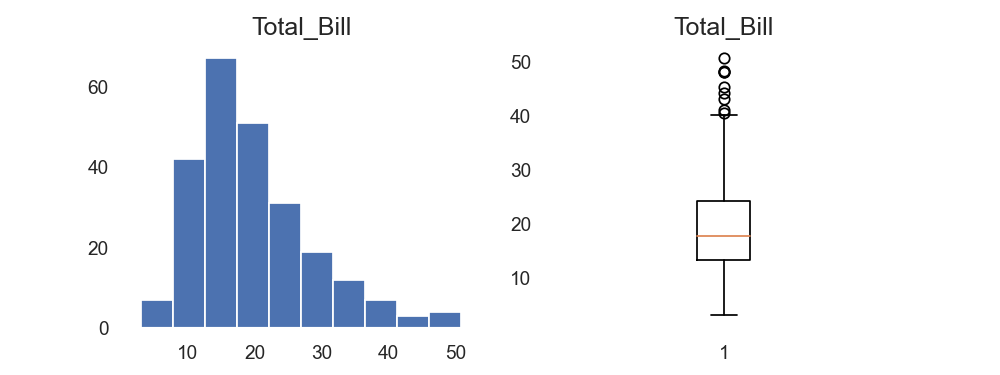

In [20]:
fig = plt.figure(figsize = (8,3))
histp = fig.add_subplot(1,2,1)
histp.hist(x = tips['total_bill'])
histp.set_title('Total_Bill')
boxp = fig.add_subplot(1,2,2)
boxp.boxplot(tips['total_bill'])
boxp.set_title('Total_Bill');

Total Bill   - distribution is right skewed, few bills value are on higher side
             - avg bill value around 15 to 22

<IPython.core.display.Javascript object>


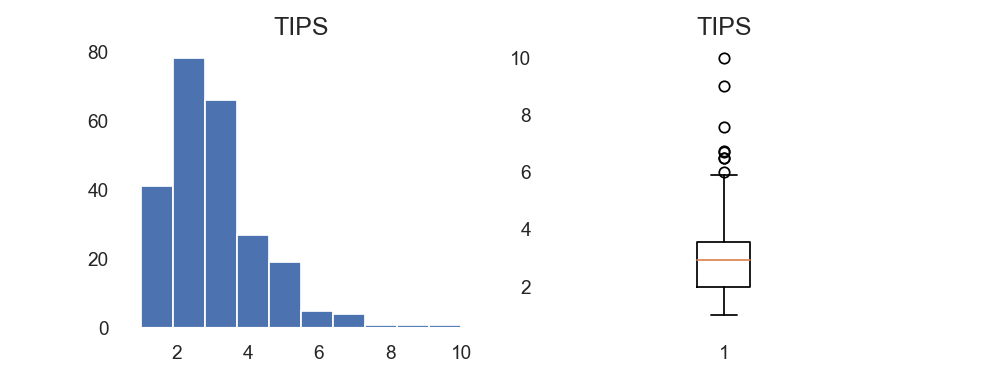

In [21]:
fig = plt.figure(figsize = (8,3))
histp = fig.add_subplot(1,2,1)
histp.hist(x = tips['tip'])
histp.set_title('TIPS')
boxp = fig.add_subplot(1,2,2)
boxp.boxplot(tips['tip'])
boxp.set_title('TIPS');

Tips         - distribution is right skewed, few tips value are on higher side
             - avg bill value around 2 to4

<IPython.core.display.Javascript object>


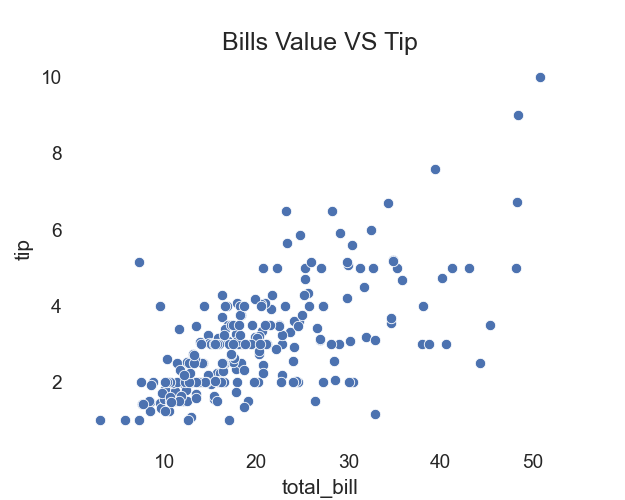

Text(0.5, 1.0, 'Bills Value VS Tip')

In [22]:
# checking is higher bills generate higher tips
fig = plt.figure(figsize = (5,4))
sns.scatterplot(x = 'total_bill', y= 'tip',data=tips)
plt.title('Bills Value VS Tip')

Observation:- pattern can be seen as higher bill value , higher tips

In [23]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


<IPython.core.display.Javascript object>


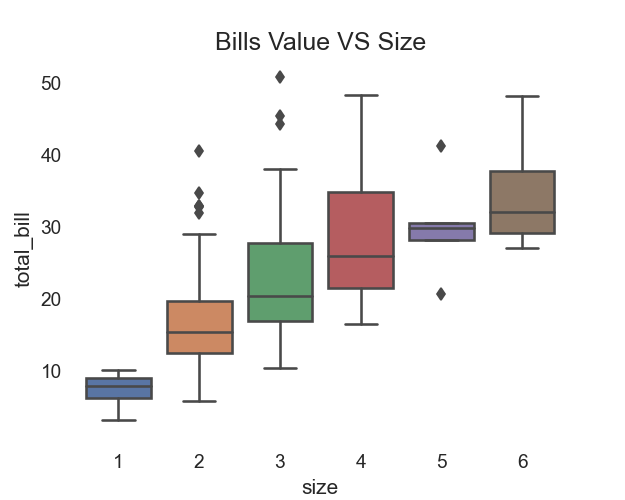

Text(0.5, 1.0, 'Bills Value VS Size')

In [24]:
# is more person does have any effect on bill
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'size', y= 'total_bill',data=tips)
plt.title('Bills Value VS Size')

Observation:- size of person has some effect on total_bill value, more people more bills

In [25]:
# Categorical EDA
# which gender are coming to resturant more

print(tips['sex'].value_counts())
print()
print((tips['sex'].value_counts(normalize=True)*100).round(2))

Male      157
Female     86
Name: sex, dtype: int64

Male      64.61
Female    35.39
Name: sex, dtype: float64


<IPython.core.display.Javascript object>


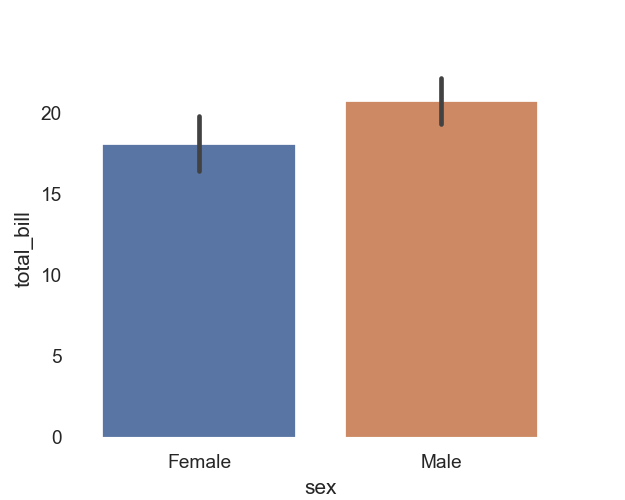

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

In [26]:
fig = plt.figure(figsize = (5,4))
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

<IPython.core.display.Javascript object>


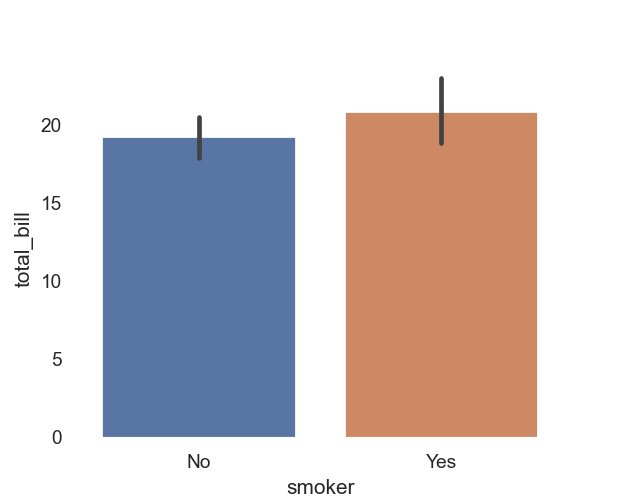

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

In [27]:
fig = plt.figure(figsize = (5,4))
sns.barplot(x = 'smoker', y = 'total_bill', data = tips)

<IPython.core.display.Javascript object>


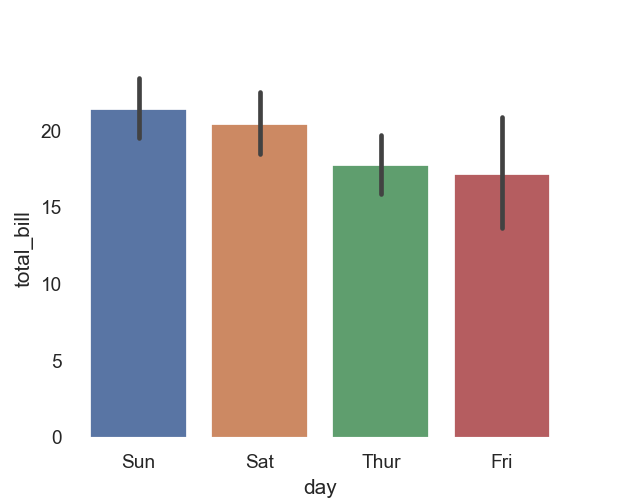

<AxesSubplot:xlabel='day', ylabel='total_bill'>

In [28]:
fig = plt.figure(figsize = (5,4))
sns.barplot(x = 'day', y = 'total_bill', data = tips)

<IPython.core.display.Javascript object>


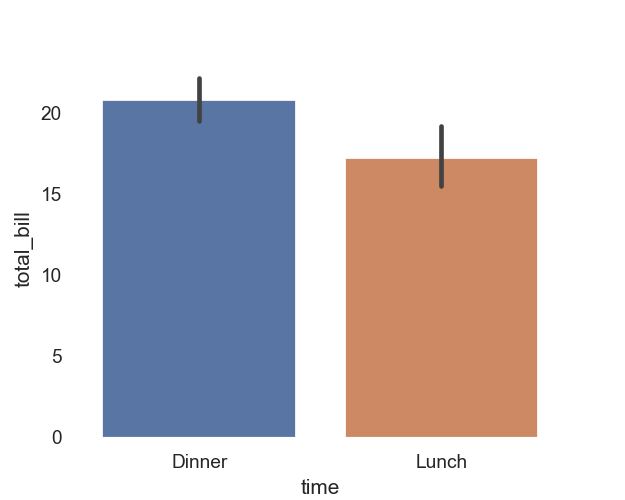

<AxesSubplot:xlabel='time', ylabel='total_bill'>

In [29]:
fig = plt.figure(figsize = (5,4))
sns.barplot(x = 'time', y = 'total_bill', data = tips)

In [30]:
pd.pivot_table(data=tips,index='time',columns='sex',aggfunc = 'count')

day        size      smoker         tip      total_bill     
sex    Female Male Female Male Female Male Female Male     Female Male
time                                                                  
Dinner     52  124     52  124     52  124     52  124         52  124
Lunch      34   33     34   33     34   33     34   33         34   33

<IPython.core.display.Javascript object>


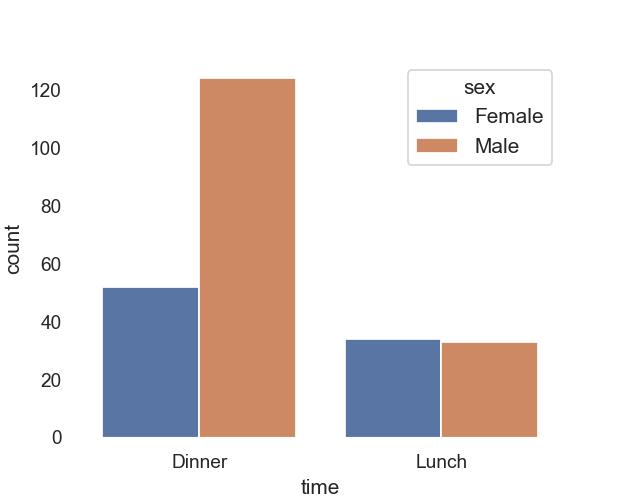

<AxesSubplot:xlabel='time', ylabel='count'>

In [31]:
fig = plt.figure(figsize = (5,4))
sns.countplot(x='time',y=None,hue='sex',data=tips)

<IPython.core.display.Javascript object>


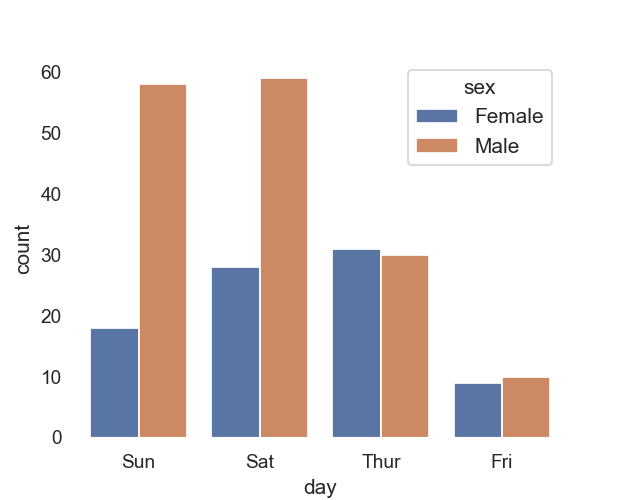

<AxesSubplot:xlabel='day', ylabel='count'>

In [32]:
fig = plt.figure(figsize = (5,4))
sns.countplot(x='day',y=None,hue='sex',data=tips)

<IPython.core.display.Javascript object>


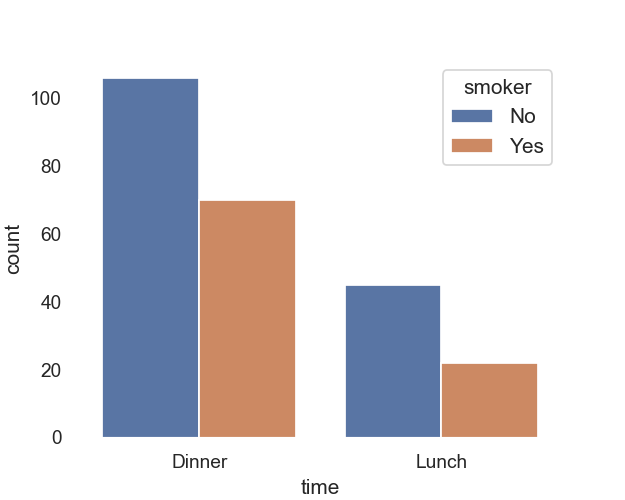

<AxesSubplot:xlabel='time', ylabel='count'>

In [33]:
fig = plt.figure(figsize = (5,4))
sns.countplot(x='time',y=None,hue='smoker',data=tips)

<IPython.core.display.Javascript object>


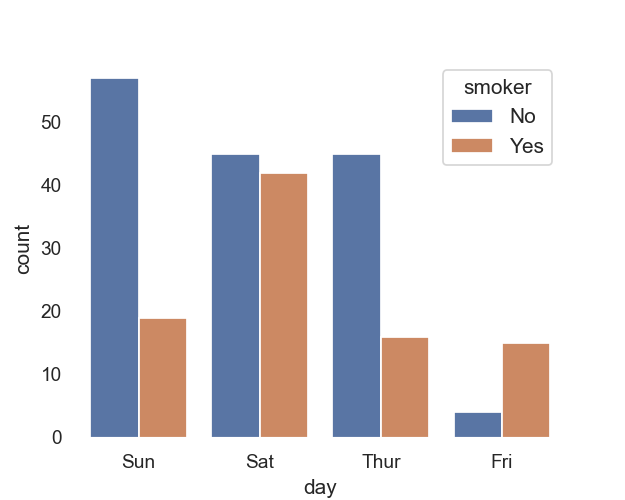

<AxesSubplot:xlabel='day', ylabel='count'>

In [34]:
fig = plt.figure(figsize = (5,4))
sns.countplot(x='day',y=None,hue='smoker',data=tips)

<IPython.core.display.Javascript object>


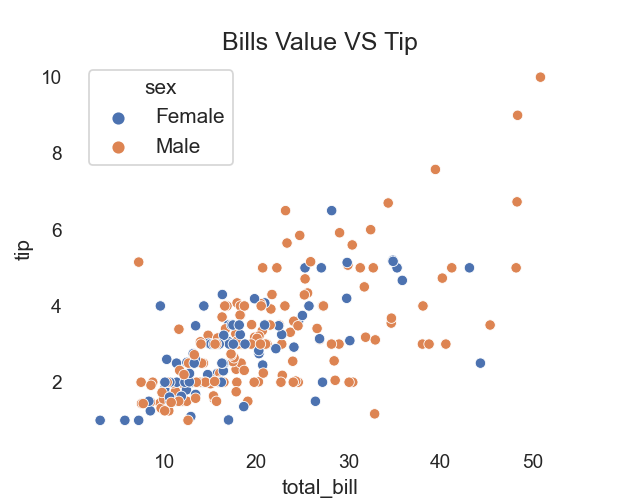

Text(0.5, 1.0, 'Bills Value VS Tip')

In [35]:
fig = plt.figure(figsize = (5,4))
sns.scatterplot(x = 'total_bill', y= 'tip',hue = 'sex',data=tips)
plt.title('Bills Value VS Tip')

<IPython.core.display.Javascript object>


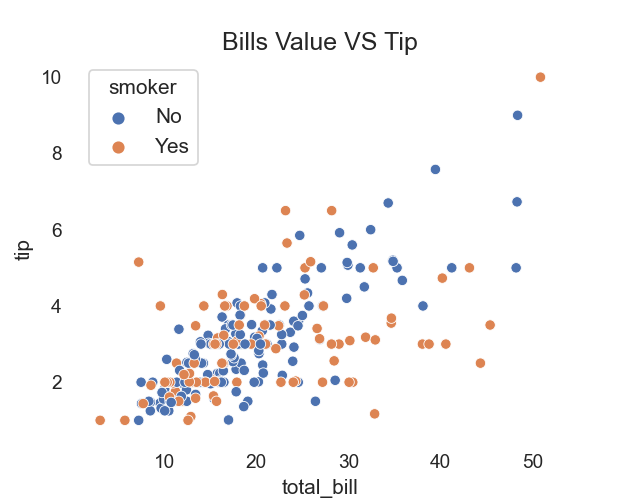

Text(0.5, 1.0, 'Bills Value VS Tip')

In [36]:
fig = plt.figure(figsize = (5,4))
sns.scatterplot(x = 'total_bill', y= 'tip',hue = 'smoker',data=tips)
plt.title('Bills Value VS Tip')

<IPython.core.display.Javascript object>


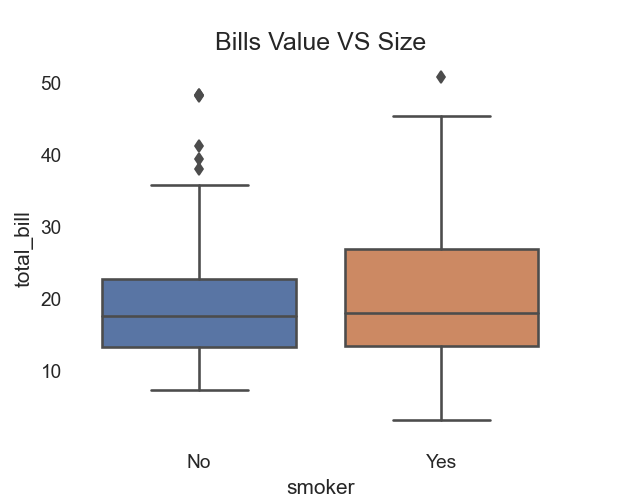

Text(0.5, 1.0, 'Bills Value VS Size')

In [37]:
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'smoker', y= 'total_bill',data=tips)
plt.title('Bills Value VS Size')

<IPython.core.display.Javascript object>


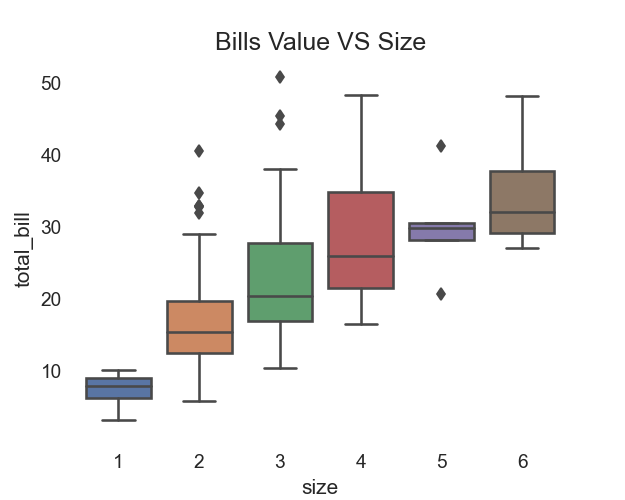

Text(0.5, 1.0, 'Bills Value VS Size')

In [38]:
fig = plt.figure(figsize = (5,4))
sns.boxplot(x = 'size', y= 'total_bill',data=tips)
plt.title('Bills Value VS Size')

<IPython.core.display.Javascript object>


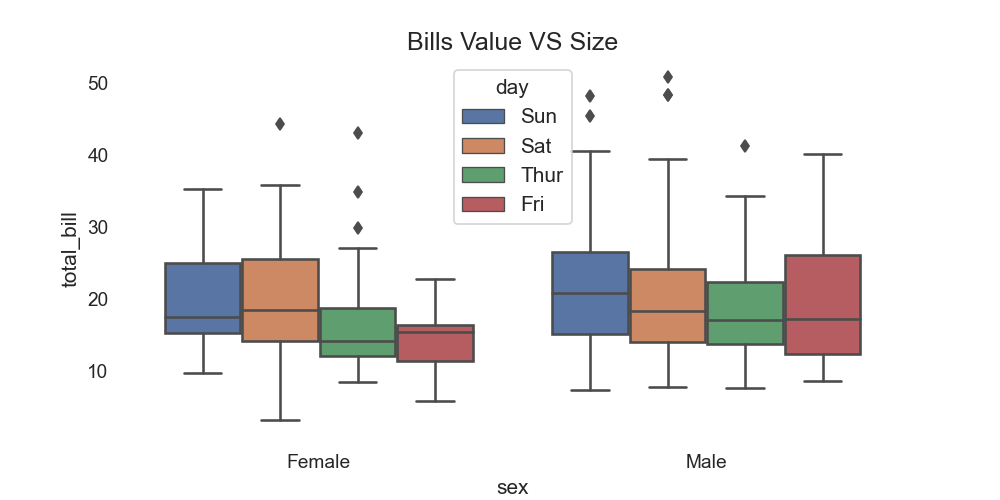

Text(0.5, 1.0, 'Bills Value VS Size')

In [39]:
fig = plt.figure(figsize = (8,4))
sns.boxplot(x = 'sex', y= 'total_bill', hue = 'day',data=tips)
plt.title('Bills Value VS Size')

In [40]:
pip jupyter nbconvert --to FORMAT notebook.ipynb

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "jupyter"

